# Warsztat 9 – Pandas - wprowadzenie<a id=top></a>

<font size=2>Przed pracą z notatnikiem polecam wykonać kod w ostatniej komórce (zawiera html i css), dzięki czemu całość będzie bardziej estetyczna :)</font>

<a href='#Warsztat-9---Pandas---wprowadzenie'>Warsztat 9</a>
<ul>
<li><a href='#Wczytywanie-danych'><span>Wczytywanie danych</span></a></li>
<li><a href='#Inspekcja-danych'><span>Inspekcja danych</span></a></li>
<li><a href='#Czyszczenie-danych'><span>Czyszczenie danych</span></a></li>
<li><a href='#Własne-funkcje'><span>Własne funkcje</span></a></li>
</ul>

<img src="http://pandas.pydata.org/_static/pandas_logo.png" width=40% height=40%>

## Pakiet Pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Wczytywanie danych

Najczęściej będziemy posługiwać się plikami **.csv** oraz **.xlsx**, z których będziemy wczytywać uprzednio wydobyte dane oraz do których będziemy zapisywać wyniki naszej pracy. Do pandas można wczytać bez problemu wiele różnych typów plików. Można jest znaleźć po nazwie zaczynającej się od <b>read_</b>.

In [3]:
#pd.read_<TAB>

In [4]:
pd.read_table?

My będziemy najczęściej używać funkcji <b>read_csv( )</b> oraz <b>read_excel( )</b>.

In [5]:
dane = pd.read_csv('./wzrost.csv')

Najwygodniejszym sposobem podglądu danych będzie użycie metod <b>.head( )</b> i <b>.tail( )</b>, które pokażą nam odpowiednio początek i koniec naszej ramki.

In [6]:
dane.head()

,;M;K
0,1;174;168
1,2;170;157
2,3;177;160
3,4;177;177
4,5;178;


In [7]:
dane.tail(3)

,;M;K
31,32;184;160
32,33;170;164
33,34;189;178


Dane wczytały się bez problemu, jednak w tej chwili wszystkie dane z wiersza zbite są w jeden element.  
Funkcja wczytująca dane potrzebuje informacji o tym, jaki znak wskazuje na podział między kolumnami.  
Domyślnie jest to przecinek, jednak nasze dane oddzielone są średnikami. Dlatego musimy nadpisać tę opcję podając wprost jaki jest symbol podziału.

In [8]:
dane = pd.read_csv('./wzrost.csv', sep=';')
dane.head(3)

,Unnamed: 0,M,K
0,1,174.0,168.0
1,2,170.0,157.0
2,3,177.0,160.0


Drugi problem to pierwsza kolumna zawierająca numery porządkowe wierszy. Możemy łatwo wskazać programowi, aby użył tej kolumny do numeracji własnych indeksów używając komendy <b>index_col=</b> i wskazując numer kolumny, w której zapisane są indeksy wierszy.

In [9]:
dane = pd.read_csv('./wzrost.csv', sep=';', index_col=0)
dane.head(3)

,M,K
1,174.0,168.0
2,170.0,157.0
3,177.0,160.0


Możemy również wykluczyć daną kolumnę z bycia wczytaną do naszej zmiennej z danymi. Wystarczy przekazać parametr z listą kolumn do wczytania.

In [10]:
dane = pd.read_csv('./wzrost.csv', sep=';', usecols=[1,2])
dane.head(3)

,M,K
0,174.0,168.0
1,170.0,157.0
2,177.0,160.0


Więcej informacji i przykładów użycia różnych funkcji wczytujących dane możecie znaleźć w bardzo dobrej dokumentacji pakietu pandas - <a href="http://pandas.pydata.org/pandas-docs/stable/io.html">tutaj</a>.

<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>

### Inspekcja danych 

Po wczytaniu danych, naszym pierwszym krokiem powinno być przyjrzenie się strukturze naszych danych. Jeśli zbiór danych jest nieduży, możemy go po prostu wyświetlić w tabeli.

In [11]:
dane

,M,K
0,174.0,168.0
1,170.0,157.0
2,177.0,160.0
3,177.0,177.0
4,178.0,NaN
5,189.0,169.0
6,183.0,174.0
7,183.0,175.0
8,193.0,168.0
9,-9.0,169.0


Podstawową informacją o zbiorze to to, jakie dane zawiera. Pomoże nam się o tym dowiedziec metoda <b>.info()</b>.

In [12]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
M    33 non-null float64
K    33 non-null float64
dtypes: float64(2)
memory usage: 624.0 bytes


Pierwsze, co dobrze byłoby zrobić, to nadać sens naszym danym, np. poprzez zmianę nazw kolumn.  
Użycie metody <b>.columns</b> pokaże nam listę zawierającą nazwy kolumn. Możemy bezpośrednio do niej przypisać nowe wartości.

In [13]:
dane.columns = ['Mężczyźni','Kobiety']
dane.head(3)

,Mężczyźni,Kobiety
0,174.0,168.0
1,170.0,157.0
2,177.0,160.0


Podobne informacje możemy uzyskać o indeksach dla każdego wiersza.

In [14]:
dane.index

RangeIndex(start=0, stop=34, step=1)

Bardziej uniwersalnym podejściem niż podglądanie całości jest jednak wykorzystanie **.head()** i **.tail()** żeby podejrzeć surowe dane. Pozostałe informacje będziemy zdobywać  z prostych statystyk opisowych oraz poglądowych wykresów. Zacznijmy od dowiedzenia się jak duży jest ten zbiór danych.

In [15]:
dane.shape

(34, 2)

Nasz zbiór ma 34 wiersze i 2 kolumny. Obie kolumny zawierają liczby, możemy je zatem scharakteryzować za pomocą np. miar tendencji centralnej. Podstawowego opisu dostarczy nam polecenie <b>.describe( )</b>.

In [16]:
dane.describe()

,Mężczyźni,Kobiety
count,33.000000,33.000000
mean,180.818182,172.484848
std,52.622152,41.257667
min,-9.000000,35.000000
25%,178.000000,164.000000
50%,183.000000,169.000000
75%,185.000000,174.000000
max,398.000000,335.000000


Już tutaj możemy zauważyć pewne problemy.  
Po pierwsze - pierwszy wiersz podaje nam mniej elementów niż posiadamy wierszy. Oznacza to najpewniej brakujące dane.  
Po drugie - wartości **min** i **max** posiadają niepokojące wartości, niepasujące zbytnio do wzrostu człowieka.  

Zanim jednak zaczniemy je naprawiać, wykorzystajmy proste wykresy do dalszej inspekcji. Bardzo wygodnym narzędziem może być histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F18F5E668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000023F1BBBBCF8>]], dtype=object)

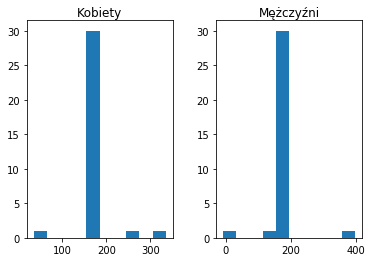

In [17]:
dane.hist(grid='off')

Pandas ułatwia nam życie poprzez wbudowanie funkcji rysujących podstawowe wykresy. Tak naprawdę, wizualizacje wykonywane są przez pakiet Matplotlib, jeśli jednak nie potrzebujemy całkowitej kontroli nad wykresem, można posłużyć się tymi wbudowanymi metodami, żeby szybko uzyskać odpowiedzi na posiadane pytania.

Histogram pokazuje nam ciekawą sytuację, większość danych znajduje się bardzo blisko siebie, tylko kilka wartości wystaje czy to lewo czy na prawo od głównego zgrupowania. Histogram ma zbyt mało przedziałów, by powiedzieć nam coś więcej, spróbujmy wymusić na nim podział danych na więcej koszyków.

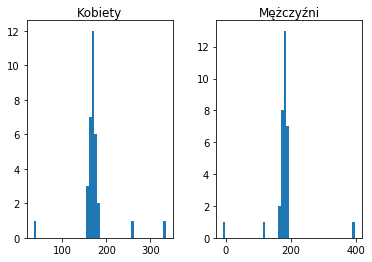

In [18]:
dane.hist(grid='off', bins=50);

Teraz widzimy już więcej i możemy z większą pewnością stwierdzić, że mamy w danych podejrzane wartości skrajne, po 3 dla każdej kolumny.  
Innym sposobem zobrazowania zawartości zbioru jest użycie wykresu pudełkowego.

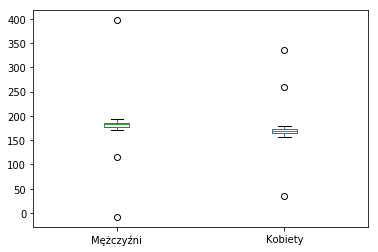

In [19]:
dane.boxplot(grid='off');

Ten wykres potwierdza nasze wątpliwości - dane zawierają tzw. outlierów. W tym przypadku możemy być pewni, że to błędy w danych. Nie zawsze jednak jest to takie oczywiste. Dlatego my po prostu usuniemy te wartości z danych, każda taka sytuacja wymaga jednak indywidualnego traktowania.

<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>  

### Czyszczenie danych

Zajmijmy się najpierw wartościami skrajnymi.  
Zestaw danych dotyczy najpopularniejszych aktorów i aktorek, z których nikt nie ma nietypowego wzrostu. Dla uproszczenia przyjmiemy, że wzrost pomiędzy 145 a 220 cm zawiera wszystkie prawdopodobne wyniki. Dlatego będziemy chcieli usunąć wartości nienależące do tego zakresu. Wykorzystamy do tego operatory boolowskie.

Zacznijmy od znalezienia wartości poniżej 145 cm.

In [20]:
dane < 145

,Mężczyźni,Kobiety
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,True,False


Otrzymujemy tabelę tego samego rozmiaru co oryginalna, w komórkach zamiast wartości liczbowych mamy wartości logiczne, **False** dla danych większych niż 145 i **True** dla mniejszych. Połączmy to z drugim warunkiem.

In [22]:
(dane < 145) | (dane > 220)

,Mężczyźni,Kobiety
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,True,False


Wykorzystamy powyższą tabelę jako maskę, którą nałożymy na oryginalne dane i wybierzemy tylko te dane, które pasują do naszego zbioru.

In [23]:
dane[(dane < 145) | (dane > 220)].dropna(how='all')

,Mężczyźni,Kobiety
9,-9.0,NaN
14,NaN,35.0
24,NaN,260.0
25,NaN,335.0
27,115.0,NaN
28,398.0,NaN


Metoda <b>.dropna(how='all')</b> usuwa z podglądu te wiersze, gdzie mamy braki w całym wierszu (czyli wiersze z dobrymi wartościami).  
Zamienimy te niepożądane wartości na NaN (czyli Not a Number), co oznacza brak w danych. Dzięki temu usuniemy te pola razem z innymi brakami, które mamy w zbiorze.

In [24]:
dane[(dane < 145) | (dane > 220)]=np.NaN
dane

,Mężczyźni,Kobiety
0,174.0,168.0
1,170.0,157.0
2,177.0,160.0
3,177.0,177.0
4,178.0,NaN
5,189.0,169.0
6,183.0,174.0
7,183.0,175.0
8,193.0,168.0
9,NaN,169.0


Teraz chcielibyśmy wyrzucić wszystkie NaNy i pozostawić wyłącznie dobre wartości. Zazwyczaj robi się to usuwając całe wiersze (bo jeden wiersz, to jedna obserwacja, więc jest nieprzydatna, jeśli posiada braki).  
W naszym przypadku wiersze są tylko porządkowe a kolumny dotyczą innych osób badanych. Posortujemy je zatem i usuniemy te wiersze, które zawierają braki.

In [25]:
dane = dane.apply(np.sort, axis=0)
dane.tail(5)

,Mężczyźni,Kobiety
29,193.0,180.0
30,NaN,NaN
31,NaN,NaN
32,NaN,NaN
33,NaN,NaN


Widzimy, że ostatnie 4 wiersze mają braki danych. Usuniemy je zatem i uznamy dane za wyczyszczone.

In [26]:
dane = dane.dropna()
dane.shape

(30, 2)

<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>  

### Statystyki opisowe

Nasze dane są wyczyszczone, dzięki czemu statystyki opisowe będą dla nas teraz dużo bardziej informatywne.

In [27]:
dane.describe()

,Mężczyźni,Kobiety
count,30.000000,30.000000
mean,182.100000,168.733333
std,5.961659,6.090883
min,170.000000,157.000000
25%,178.000000,164.250000
50%,183.000000,169.000000
75%,185.000000,172.500000
max,193.000000,180.000000


Teraz całość wygląda bardziej spójnie. Spróbujmy jeszcze zobaczyć to samo na wykresie pudełkowym.

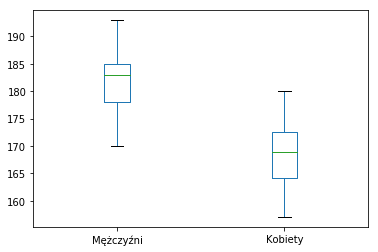

In [28]:
dane.boxplot(grid='off');

Interesujący może być też widok na dystrybucję. Powtórzmy więc rysowanie histogramu, tym razem na jednym wykresie.

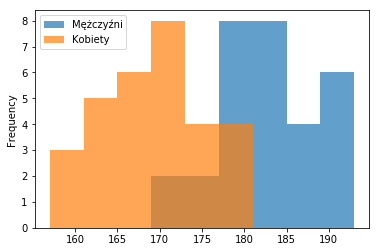

In [29]:
dane.plot(kind='hist', bins=9, alpha=0.7);

Innym sposobem jest wyrysowanie tzw. <a href="https://pl.wikipedia.org/wiki/Estymator_j%C4%85drowy_g%C4%99sto%C5%9Bci">estymatora jądrowego gęstości</a>, co pozwoli nam przybliżyć rozkład naszych zmiennych.

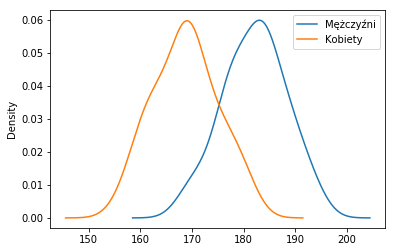

In [30]:
dane.plot.kde();

Skoro mamy rozkład, to porównajmy sobie ich skośność oraz kurtozę.

In [31]:
dane.skew()

Mężczyźni   -0.156972
Kobiety      0.082612
dtype: float64

In [32]:
dane.kurtosis()

Mężczyźni   -0.300590
Kobiety     -0.584714
dtype: float64

Innym interesującym aspektem może być korelacja pomiędzy zmiennymi. Współczynniki korelacji uzyskamy za pomocą metody <b>.corr()</b>.

In [33]:
dane.corr()

,Mężczyźni,Kobiety
Mężczyźni,1.000000,0.977929
Kobiety,0.977929,1.000000


Przydatnym narzędziem do inspekcji zależności pomiędzy zmiennymi jest matryca rozrzutu.

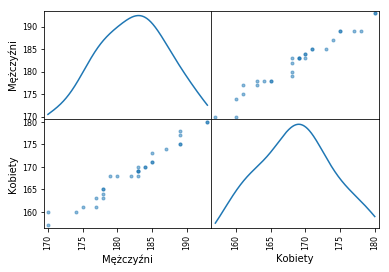

In [34]:
pd.tools.plotting.scatter_matrix(dane, diagonal='kde');

Dane w naszym zbiorze pochodzą z rozkładu normalnego, siłą reczy będą ze sobą maksymalnie skorelowane (szczególnie po sortowaniu).

<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>  

### Własne funckcje

Pandas pozwala na wykorzystanie własnych funkcji na danych. Widzieliśmy to przy okazji sortowania elementów dla każdej kolumny.  
Spróbujemy teraz napisać kilka własnych funkcji i dostosować je do użycia z pakietem pandas.

Zacznijmy od czegoś prostego, np. mediany. Pierwszym krokiem jest napisanie i przetestowanie odpowiedniej funkcji.  
Najpierw wzakodujmy wersję dla parzystej liczby elementów.

In [35]:
def mediana(dane):
    dane = np.sort(dane)
    if len(dane)%2==0:
        middle = int(len(dane)/2)
        return (dane[middle-1]+dane[middle])/2

In [36]:
zbior = [1,2,3,4,5,6,7,8]
len(zbior)

8

In [37]:
mediana(zbior)

4.5

Dodajmy teraz drugą część funkcji.

In [38]:
def mediana(dane):
    dane = np.sort(dane)
    if len(dane)%2==0:
        middle = int(len(dane)/2)
        return (dane[middle-1]+dane[middle])/2
    else:
        middle = len(dane)//2
        return dane[middle]

In [39]:
zbior2 = [1,2,3,4,5,6,7,8,9]
len(zbior2)

9

In [40]:
mediana(zbior2)

5

Możemy teraz użyć naszej zindywidualizowanej funkcji na zbiorze danych.

In [41]:
dane.apply(mediana, axis=0)

Mężczyźni    183.0
Kobiety      169.0
dtype: float64

Wyniki wyglądają na pierwszy rzut oka poprawnie. Skonfrontujmy to z wbudowaną funkcją.

In [42]:
dane.median()

Mężczyźni    183.0
Kobiety      169.0
dtype: float64

Wyniki są dokładnie takie same, mamy zatem pewność, że nasza funkcja działa dobrze i została użyta przez pandas poprawnie.

W taki sam sposób możemy tworzyć dowolne funkcje działające na obiekty wieloementowe (jak nasze kolumny z danymi).  
Możliwe jest również wykorzystanie analogicznej metody do wykonania przekształceń na każdym elemencie z osobna.  
Służy do tego metoda <b>.applymap( )</b>.

In [43]:
def nowa_funkcja(dane):
    if dane < 170:
        return 'niski wzrost'
    else:
        return 'wysoki wzrost'

In [44]:
dane.applymap(nowa_funkcja)

,Mężczyźni,Kobiety
0,wysoki wzrost,niski wzrost
1,wysoki wzrost,niski wzrost
2,wysoki wzrost,niski wzrost
3,wysoki wzrost,niski wzrost
4,wysoki wzrost,niski wzrost
5,wysoki wzrost,niski wzrost
6,wysoki wzrost,niski wzrost
7,wysoki wzrost,niski wzrost
8,wysoki wzrost,niski wzrost
9,wysoki wzrost,niski wzrost


<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>  

### Ćwiczenia

Wypróbujemy teraz wszystkie dotychczasowe informacje na nowym pliku z danymi.  
Ten będzie zawierał <a href='https://en.wikipedia.org/wiki/Iris_flower_data_set'>klasyczny zestaw dotyczący irysów</a> opublikowany przez Ronalda Fishera.

In [ ]:
iris = pd.read_table('./iris.data', sep=',')

<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>  

In [1]:
from IPython.core.display import HTML
from urllib.request import urlopen
HTML(urlopen("https://raw.githubusercontent.com/mkoculak/hello_world/nowa/ipython.css").read().decode("utf-8"))